# Import Required Libraries

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from datetime import datetime
import scipy
import netCDF4 as nc
import csv
from numpy import arange, dtype 
import xarray as xr
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200) 
pd.options.display.float_format = '{:.3f}'.format # to get rid of logarithmic values like e

# TASK 1

In [199]:
class Dummy:
    
    # Implement a class with the name Dummy which has a private attribute bias and a private attribute baseline. 
    # baseline should be initialized with a value of 1/3 by default.
    
    # Here, there does not need to use "__" but I did not understand why it did not work. (stackoverflow)
    def __init__(self, bias, baseline=(1/3)): 
        self.__bias = bias
        self.baseline = baseline
    
    # Create a read-only property for bias which returns the bias using the @property decorator.
    
    
    # No underscore: it's a public variable.
    # One underscore: it's a protected variable.
    # Two underscores: it's a private variable.    
    @property
    def bias(self):
        return self.__bias
    
    # Create a property setter (again using a respective decorator) for baseline which sets baseline to a given value.
    
    @bias.setter
    def bias(self, value):
        self.__baseline = value
        
    # Create a function with an input parameter called multiplier which calculates 
    # multiplier times baseline plus bias and returns the result rounded to 3 digits.    
        
    def func(self, multiplier):
        return round(multiplier * self.baseline + self.bias, 3)

In [200]:
test=Dummy(100)

In [201]:
test.bias

100

In [202]:
test.baseline

0.3333333333333333

In [203]:
test.func(5)

101.667

In [204]:
# Create a function which returns the current date and time in the format hh:mm:ss dd/mm/yy.

def get_date_time_now():
    import time
    return time.strftime("%H:%M:%S %d/%m/%y")

print(get_date_time_now())

17:11:20 13/01/22


# TASK 2
Data Description

# 
Load and know the dataset

In [205]:
df=pd.read_csv("/Users/onurhanaydin/Desktop/Archive/dataset.csv")
df.head()

event_time             order_id           product_id  \
0  2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
1  2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
2  2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
3  2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
4  2020-04-24 19:16:21 UTC  2294584263154074236  2273948316817424439   

              category_id                category_code    brand   price  \
0 2268105426648171008.000           electronics.tablet  samsung 162.010   
1 2268105426648171008.000           electronics.tablet  samsung 162.010   
2 2268105430162997760.000  electronics.audio.headphone   huawei  77.520   
3 2268105430162997760.000  electronics.audio.headphone   huawei  77.520   
4 2268105471367840000.000                          NaN  karcher 217.570   

                  user_id  
0 1515915625441993984.000  
1 1515915625441993984.000  
2 1515915625447879424.000  
3 1515915625447879424.000  
4 1515915625443148032.000

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


In [207]:
df.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

# 
We have a lot of missing values. So, we would like to insert a model, we have to get rid of the missing values.

In [208]:
df.price.value_counts(dropna=False).sort_index(ascending=False)

50925.900         1
18328.680         1
13310.160         1
11574.050         2
10416.640         1
              ...  
0.140             3
0.090             1
0.020          3448
0.000           121
NaN          431954
Name: price, Length: 2803, dtype: int64

# 
I focus on the price because it is the most important parameter of the dataset. 
As well as here, we can see the outliers and NaN values. They are effective.

In [209]:
df.price.describe()

count   2201567.000
mean        154.093
std         241.942
min           0.000
25%          14.560
50%          55.530
75%         196.740
max       50925.900
Name: price, dtype: float64

# 
Range (max-min) is very big. Mean is bigger than median.So, we can say it is right skewness. 

In [210]:
# Get a feeling for the variables price and category_code, report the histogram of price.

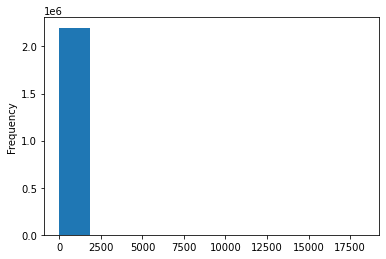

In [211]:
df[df.price < 30000].price.plot(kind='hist');

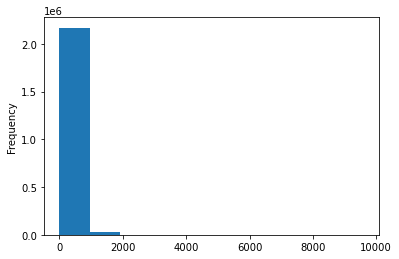

In [212]:
df[df.price < 10000].price.plot(kind='hist');

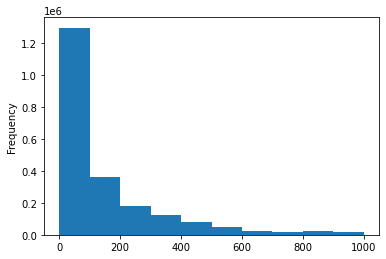

In [213]:
df[df.price < 1000].price.plot(kind='hist');

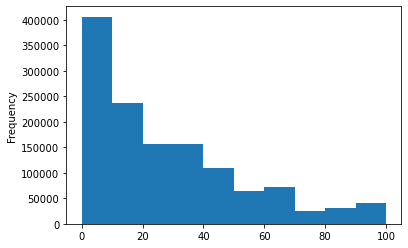

In [214]:
df[df.price < 100].price.plot(kind='hist');

In [215]:
# Due to NaN values, I used coerce method

df["category_id"]=np.floor(pd.to_numeric(df["category_id"], errors='coerce')).astype('Int64')

In [216]:
df["event_time"] = pd.to_datetime(df["event_time"])

In [217]:
df["user_id"]=np.floor(pd.to_numeric(df["user_id"], errors='coerce')).astype('Int64')

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   order_id       int64              
 2   product_id     int64              
 3   category_id    Int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        Int64              
dtypes: Int64(2), datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 165.8+ MB


In [219]:
df["category_code"].str.split(".", expand=True)

0           1          2
0        electronics      tablet       None
1        electronics      tablet       None
2        electronics       audio  headphone
3        electronics       audio  headphone
4                NaN         NaN        NaN
...              ...         ...        ...
2633516  electronics  smartphone       None
2633517  electronics  smartphone       None
2633518   appliances    personal     scales
2633519          NaN         NaN        NaN
2633520   appliances     kitchen    blender

[2633521 rows x 3 columns]

In [220]:
df["subcat_a"]=df["category_code"].str.split(".", expand=True).loc[:,0]
df["subcat_b"]=df["category_code"].str.split(".", expand=True).loc[:,1]
df["subcat_c"]=df["category_code"].str.split(".", expand=True).loc[:,2]
df.head()

event_time             order_id           product_id  \
0 2020-04-24 11:50:39+00:00  2294359932054536986  1515966223509089906   
1 2020-04-24 11:50:39+00:00  2294359932054536986  1515966223509089906   
2 2020-04-24 14:37:43+00:00  2294444024058086220  2273948319057183658   
3 2020-04-24 14:37:43+00:00  2294444024058086220  2273948319057183658   
4 2020-04-24 19:16:21+00:00  2294584263154074236  2273948316817424439   

           category_id                category_code    brand   price  \
0  2268105426648171008           electronics.tablet  samsung 162.010   
1  2268105426648171008           electronics.tablet  samsung 162.010   
2  2268105430162997760  electronics.audio.headphone   huawei  77.520   
3  2268105430162997760  electronics.audio.headphone   huawei  77.520   
4  2268105471367840000                          NaN  karcher 217.570   

               user_id     subcat_a subcat_b   subcat_c  
0  1515915625441993984  electronics   tablet       None  
1  1515915625441993984  electronics   tablet       None  
2  1515915625447879424  electronics    audio  headphone  
3  1515915625447879424  electronics    audio  headphone  
4  1515915625443148032          NaN      NaN        NaN

In [221]:
# Change the position of the columns

df=df.iloc[:,[0,1,2,3,4,8,9,10,5,6,7]] 
df.head()

event_time             order_id           product_id  \
0 2020-04-24 11:50:39+00:00  2294359932054536986  1515966223509089906   
1 2020-04-24 11:50:39+00:00  2294359932054536986  1515966223509089906   
2 2020-04-24 14:37:43+00:00  2294444024058086220  2273948319057183658   
3 2020-04-24 14:37:43+00:00  2294444024058086220  2273948319057183658   
4 2020-04-24 19:16:21+00:00  2294584263154074236  2273948316817424439   

           category_id                category_code     subcat_a subcat_b  \
0  2268105426648171008           electronics.tablet  electronics   tablet   
1  2268105426648171008           electronics.tablet  electronics   tablet   
2  2268105430162997760  electronics.audio.headphone  electronics    audio   
3  2268105430162997760  electronics.audio.headphone  electronics    audio   
4  2268105471367840000                          NaN          NaN      NaN   

    subcat_c    brand   price              user_id  
0       None  samsung 162.010  1515915625441993984  
1       None  samsung 162.010  1515915625441993984  
2  headphone   huawei  77.520  1515915625447879424  
3  headphone   huawei  77.520  1515915625447879424  
4        NaN  karcher 217.570  1515915625443148032

In [222]:
# Given the data we have, we would like to generate two new variables:
# time_hours (Integer):

df["hour"] = pd.DatetimeIndex(df["event_time"]).hour

In [223]:
# weekday (integer):

df["day_of_week"] = df["event_time"].dt.dayofweek

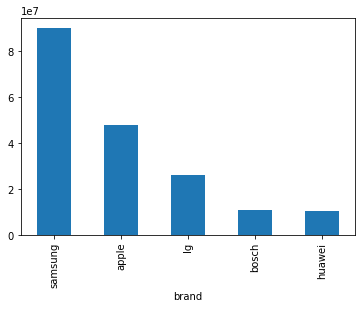

In [224]:
# Which brand had the most sales volume? Plot a graph of the top 5 brands comparing their sales volume.

df.groupby(["brand"])["price"].sum().sort_values(ascending=False).head(5).plot(kind="bar");

In [225]:
# Which category had the highest average price?

df.groupby(["category_code"])["price"].mean().sort_values(ascending=False).head(1)

category_code
electronics.camera.video   620.713
Name: price, dtype: float64

In [226]:
# Which brand and category has the most sales of a price of under 20 currency units?

df[df["price"]<20].groupby(["brand", "category_code"])["price"].sum().sort_values(ascending=False).head(1)

brand  category_code            
ava    appliances.kitchen.kettle   135086.660
Name: price, dtype: float64

In [227]:
df.head(2)

event_time             order_id           product_id  \
0 2020-04-24 11:50:39+00:00  2294359932054536986  1515966223509089906   
1 2020-04-24 11:50:39+00:00  2294359932054536986  1515966223509089906   

           category_id       category_code     subcat_a subcat_b subcat_c  \
0  2268105426648171008  electronics.tablet  electronics   tablet     None   
1  2268105426648171008  electronics.tablet  electronics   tablet     None   

     brand   price              user_id  hour  day_of_week  
0  samsung 162.010  1515915625441993984    11            4  
1  samsung 162.010  1515915625441993984    11            4

In [228]:
# Write a function that plots the distribution of the sales volume over the weekdays.

def plotting():
    
    plt.figure(figsize=(8,4))

    ax = sns.barplot(data=df, y=df["day_of_week"].value_counts(), x=df["day_of_week"].value_counts().index)
    ax.set_xlabel("Days")
    ax.set_ylabel("count")

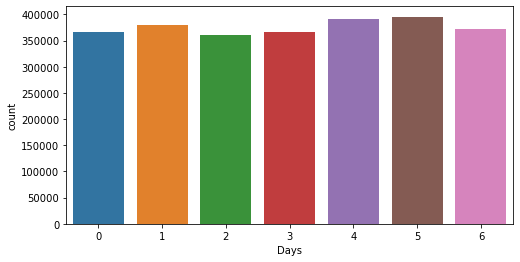

In [229]:
plotting()

# TASK 3

In [230]:
df["year"] = pd.DatetimeIndex(df["event_time"]).year

In [231]:
df.head()

event_time             order_id           product_id  \
0 2020-04-24 11:50:39+00:00  2294359932054536986  1515966223509089906   
1 2020-04-24 11:50:39+00:00  2294359932054536986  1515966223509089906   
2 2020-04-24 14:37:43+00:00  2294444024058086220  2273948319057183658   
3 2020-04-24 14:37:43+00:00  2294444024058086220  2273948319057183658   
4 2020-04-24 19:16:21+00:00  2294584263154074236  2273948316817424439   

           category_id                category_code     subcat_a subcat_b  \
0  2268105426648171008           electronics.tablet  electronics   tablet   
1  2268105426648171008           electronics.tablet  electronics   tablet   
2  2268105430162997760  electronics.audio.headphone  electronics    audio   
3  2268105430162997760  electronics.audio.headphone  electronics    audio   
4  2268105471367840000                          NaN          NaN      NaN   

    subcat_c    brand   price              user_id  hour  day_of_week  year  
0       None  samsung 162.010  1515915625441993984    11            4  2020  
1       None  samsung 162.010  1515915625441993984    11            4  2020  
2  headphone   huawei  77.520  1515915625447879424    14            4  2020  
3  headphone   huawei  77.520  1515915625447879424    14            4  2020  
4        NaN  karcher 217.570  1515915625443148032    19            4  2020

In [232]:
# Write a function with two inputs, X and Y, that calculates the total cost of sales volume of category X in year Y.

def total_cost(x, y):
    return df[(df["category_code"]== x)&(df["year"]==y)]["price"].sum()

print(total_cost("electronics.tablet", 2020))

5386653.259999999
